## Observations and Insights 

In [250]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_results_df = pd.DataFrame(study_results, columns=[
                        "Mouse ID", "Timepoint", "Tumor Volume (mm3)","Metastatic Sites"])

mouse_metadata_df = pd.DataFrame(mouse_metadata, columns=[
                        "Mouse ID", "Drug Regimen", "Sex","Age_months", "Weight (g)"])


mergemouse_df = pd.merge(study_results_df, mouse_metadata_df, on="Mouse ID")

# Display the data table for preview
mergemouse_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [251]:
# Checking the number of mice.
mergemouse_df.count()

Mouse ID              1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
dtype: int64

In [252]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates_values = mergemouse_df[mergemouse_df.duplicated(subset=['Mouse ID','Timepoint'], keep=False)]

In [253]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicates_values


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [254]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mergemouse_1 = mergemouse_df.drop_duplicates(
  subset = ['Mouse ID', 'Timepoint'],
  keep = 'last').reset_index(drop = True)

In [255]:
# Checking the number of mice in the clean DataFrame.
mergemouse_1.count()

Mouse ID              1888
Timepoint             1888
Tumor Volume (mm3)    1888
Metastatic Sites      1888
Drug Regimen          1888
Sex                   1888
Age_months            1888
Weight (g)            1888
dtype: int64

## Summary Statistics

In [256]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen


mergemouse_1

mergemouse_2 = pd.DataFrame(mergemouse_1, columns=["Drug Regimen","Tumor Volume (mm3)"])


# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
Analysis_groupmouse = mergemouse_2.groupby(["Drug Regimen"])
Analysis_groupmouse

Analysis_groupmouse1 = Analysis_groupmouse

Analysis_groupmouse2 = round(Analysis_groupmouse1[["Tumor Volume (mm3)"]].mean(),2)
Analysis_groupmouse3 = round(Analysis_groupmouse1[["Tumor Volume (mm3)"]].median(),2)
Analysis_groupmouse4 = round(Analysis_groupmouse1[["Tumor Volume (mm3)"]].var(),2)
Analysis_groupmouse5 = round(Analysis_groupmouse1[["Tumor Volume (mm3)"]].std(),2)
Analysis_groupmouse6 = round(Analysis_groupmouse1[["Tumor Volume (mm3)"]].sem(),2)


##Merging frames
Analysis_groupmouse2 = Analysis_groupmouse2.merge(Analysis_groupmouse3, on="Drug Regimen")
Analysis_groupmouse2 = Analysis_groupmouse2.merge(Analysis_groupmouse4, on="Drug Regimen")

Analysis_groupmouse2 = Analysis_groupmouse2.rename(
    columns={"Tumor Volume (mm3)_x": "Mean", "Tumor Volume (mm3)_y": "Median", "Tumor Volume (mm3)": "Variance"})
Analysis_groupmouse2 = Analysis_groupmouse2.merge(Analysis_groupmouse5, on="Drug Regimen")
Analysis_groupmouse2 = Analysis_groupmouse2.merge(Analysis_groupmouse6, on="Drug Regimen")
Analysis_groupmouse2 = Analysis_groupmouse2.rename(
    columns={"Tumor Volume (mm3)_x": "STD", "Tumor Volume (mm3)_y": "SEM"})

# Assemble the resulting series into a single summary dataframe.
Analysis_groupmouse_vf = Analysis_groupmouse2
Analysis_groupmouse_vf




,Mean,Median,Variance,STD,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.38,50.78,43.22,6.57,0.53
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [257]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mergemouse_1

mergemouse_A = pd.DataFrame(mergemouse_1, columns=["Drug Regimen","Tumor Volume (mm3)"])


# Using the aggregation method, produce the same summary statistics in a single line
Analysis_groupmouseTest = round(mergemouse_A.groupby(["Drug Regimen"]).agg(['mean','median','var','std','sem']),2)

# Changing Columns Labels.
Analysis_groupmouseTest = Analysis_groupmouseTest.rename(
    columns={"mean": "Mean", "median": "Median", "var": "Variance", "std": "STD", "sem": "SEM" })
Analysis_groupmouseTest




Tumor Volume (mm3)                            
                           Mean Median Variance   STD   SEM
Drug Regimen                                               
Capomulin                 40.68  41.56    24.95  4.99  0.33
Ceftamin                  52.59  51.78    39.29  6.27  0.47
Infubinol                 52.88  51.82    43.13  6.57  0.49
Ketapril                  55.24  53.70    68.55  8.28  0.60
Naftisol                  54.33  52.51    66.17  8.13  0.60
Placebo                   54.03  52.29    61.17  7.82  0.58
Propriva                  52.38  50.78    43.22  6.57  0.53
Ramicane                  40.22  40.67    23.49  4.85  0.32
Stelasyn                  54.23  52.43    59.45  7.71  0.57
Zoniferol                 53.24  51.82    48.53  6.97  0.52

 Bar and Pie Charts

In [258]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
%matplotlib notebook
mergemouse_1
mergemouse_bar = pd.DataFrame(mergemouse_1, columns=["Drug Regimen","Tumor Volume (mm3)"])


# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
Analysis_groupmouse_bar = mergemouse_bar.groupby(["Drug Regimen"])
Analysis_groupmouse_bar

Analysis_groupmouse1_bar = Analysis_groupmouse_bar

Analysis_groupmouse2_bar = round(Analysis_groupmouse1_bar[["Tumor Volume (mm3)"]].count(),2)
Analysis_groupmouse2_bar = Analysis_groupmouse2_bar.rename(
    columns={"Tumor Volume (mm3)": "Total Number of Measurements"})
Analysis_groupmouse2_bar.plot(kind="bar", title = "Total of Measurements vs Drug Regimen", rot =0, fontsize = 6, legend = 0, ylabel= "Total of Measurements", colormap = "winter" )




<IPython.core.display.Javascript object>

<AxesSubplot:title={'center':'Total of Measurements vs Drug Regimen'}, xlabel='Drug Regimen', ylabel='Total of Measurements'>

In [259]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot..
%matplotlib notebook
mergemouse_1
mergemouse_bar = pd.DataFrame(mergemouse_1, columns=["Drug Regimen","Tumor Volume (mm3)"])


# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
Analysis_groupmouse_bar = mergemouse_bar.groupby(["Drug Regimen"])
Analysis_groupmouse_bar

Analysis_groupmouse1_bar = Analysis_groupmouse_bar

Analysis_groupmouse2_bar = round(Analysis_groupmouse1_bar[["Tumor Volume (mm3)"]].count(),2)
Analysis_groupmouse2_bar = Analysis_groupmouse2_bar.rename(
    columns={"Tumor Volume (mm3)": "Total Number of Measurements"})
Analysis_groupmouse2_bar.head()

x_axis = Analysis_groupmouse2_bar.index.values.tolist()
x_axis
x_axis1= np.arange(len(x_axis))
x_axis1
y_axis = Analysis_groupmouse2_bar["Total Number of Measurements"].to_numpy()
y_axis

plt.bar(x_axis, y_axis, color ="b", align = "center")

# Give the chart a title, x label, and y label
plt.title("Total Number of Measurements vs Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Number of Measurements")
plt.xticks(fontsize=6)


<IPython.core.display.Javascript object>

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

In [260]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
%matplotlib notebook
mouse_metadata_df
mergemouse_sex = pd.DataFrame(mouse_metadata_df, columns=["Mouse ID","Sex"])
Analysis_groupmouse_sex = mergemouse_sex.groupby(["Sex"])
Analysis_groupmouse_sex

Analysis_groupmouse_sex = Analysis_groupmouse_sex

Analysis_groupmouse2_sex = round(Analysis_groupmouse_sex[["Mouse ID"]].count(),2)
Analysis_groupmouse2_sex
Analysis_groupmouse2_sex.plot(kind="pie", title = "Distribution of female versus male mice", subplots= True, legend = 0, colormap = "Pastel1")

<IPython.core.display.Javascript object>

array([<AxesSubplot:ylabel='Mouse ID'>], dtype=object)

<IPython.core.display.Javascript object>


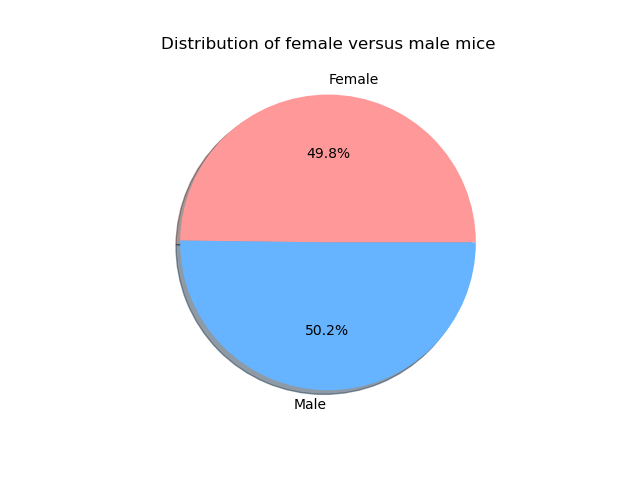

Text(0.5, 1.0, 'Distribution of female versus male mice')

In [261]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
%matplotlib notebook
mouse_metadata_df
mergemouse_sex = pd.DataFrame(mouse_metadata_df, columns=["Mouse ID","Sex"])
Analysis_groupmouse_sex = mergemouse_sex.groupby(["Sex"])
Analysis_groupmouse_sex

Analysis_groupmouse_sex = Analysis_groupmouse_sex

Analysis_groupmouse2_sex = round(Analysis_groupmouse_sex[["Mouse ID"]].count(),2)
Analysis_groupmouse2_sex

label_sex = Analysis_groupmouse2_sex.index.values.tolist()
label_sex
label_sex1= np.arange(len(label_sex))
label_sex1
sizes_sex = Analysis_groupmouse2_sex["Mouse ID"].to_numpy()
sizes_sex

colors = ['#ff9999','#66b3ff']
explode = (0,0)

plt.pie(sizes_sex, explode=explode, labels=label_sex, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=0)
plt.title("Distribution of female versus male mice")



## Quartiles, Outliers and Boxplots

In [262]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

%matplotlib notebook
mergemouse_1
mergemouse_quart = pd.DataFrame(mergemouse_1, columns=["Mouse ID", "Timepoint", "Tumor Volume (mm3)", "Drug Regimen"])

# Start by getting the last (greatest) timepoint for each mouse
Analysis_groupmouse_quart = mergemouse_quart.groupby(["Drug Regimen", "Mouse ID"]).last()['Tumor Volume (mm3)']

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
Analysis_groupmouse_quart_df = Analysis_groupmouse_quart.to_frame()
Analysis_groupmouse_quart_df

# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


Analysis_groupmouse_quart_df2 = Analysis_groupmouse_quart_df.reset_index()
Analysis_groupmouse_quart_df2
groupmouse_tumor = Analysis_groupmouse_quart_df2.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(list)
groupmouse_tumor_df = pd.DataFrame(groupmouse_tumor)
groupmouse_tumor_df2 = groupmouse_tumor_df .reindex(['Capomulin', 'Ramicane', 'Infubinol','Ceftamin'])
groupmouse_tumor_df2


,Tumor Volume (mm3)
Drug Regimen,
Capomulin,"[38.98287774, 38.93963263, 30.48598484, 37.074..."
Ramicane,"[38.407618299999996, 43.04754260000001, 38.810..."
Infubinol,"[67.97341878, 65.52574285, 57.03186187, 66.083..."
Ceftamin,"[62.99935619, 45.0, 56.05774909, 55.74282869, ..."


<IPython.core.display.Javascript object>


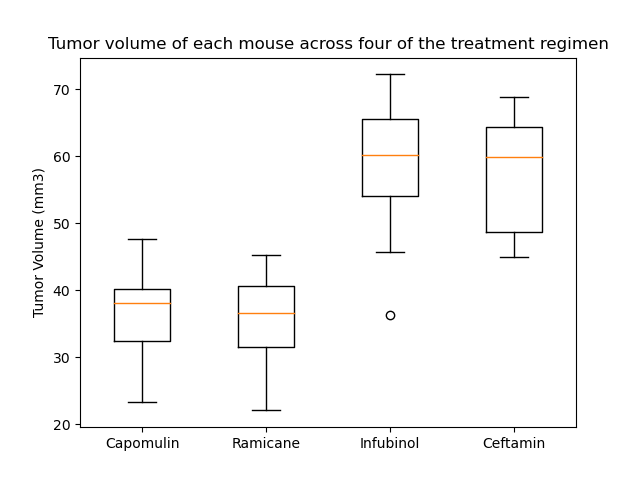

In [263]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
tumor_data_list = [cont for cont in groupmouse_tumor_df2['Tumor Volume (mm3)']]
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor volume of each mouse across four of the treatment regimen')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(tumor_data_list, labels=['Capomulin', 'Ramicane', 'Infubinol','Ceftamin'])
plt.show()

    

<IPython.core.display.Javascript object>


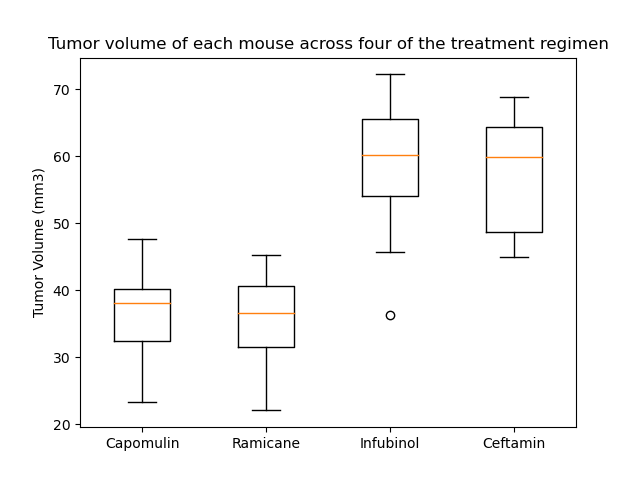

In [264]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
tumor_data_list = [cont for cont in groupmouse_tumor_df2['Tumor Volume (mm3)']]
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor volume of each mouse across four of the treatment regimen')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(tumor_data_list, labels=['Capomulin', 'Ramicane', 'Infubinol','Ceftamin'])
plt.show()

## Line and Scatter Plots

In [265]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
%matplotlib notebook
CapomulinMouse = mergemouse_1[mergemouse_1["Mouse ID"].isin(["w914"])]
CapomulinMouse

CapomulinMouse2 = CapomulinMouse[["Timepoint", "Tumor Volume (mm3)"]]
CapomulinMouse2

x_axis_mouse = CapomulinMouse2["Timepoint"].to_numpy()
y_axis_mouse = CapomulinMouse2["Tumor Volume (mm3)"].to_numpy()

plt.plot(x_axis_mouse, y_axis_mouse)
plt.title("Tumor Volume (mm3) vs Timepoint) in mouse W914")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.show()



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


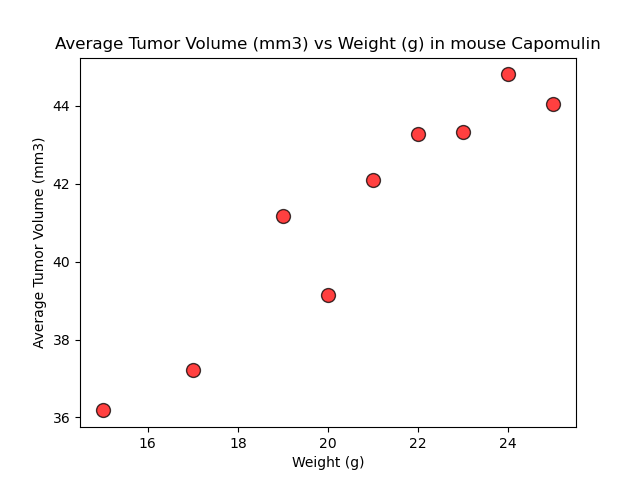

In [266]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
%matplotlib notebook
CapomulinMouse_scat = mergemouse_1[mergemouse_1["Drug Regimen"].isin(["Capomulin"])]
CapomulinMouse_scat

CapomulinMouse_scat_2 = CapomulinMouse_scat[["Tumor Volume (mm3)","Weight (g)"]]
CapomulinMouse_scat_2


CapomulinMouse_scat_3 = CapomulinMouse_scat_2.groupby(["Weight (g)"])
CapomulinMouse_scat_3

CapomulinMouse_scat_4 = CapomulinMouse_scat_3
CapomulinMouse_scat_4 = round(CapomulinMouse_scat_3[["Tumor Volume (mm3)"]].mean(),2)
CapomulinMouse_scat_4

x_axis_scat = CapomulinMouse_scat_4.index.values.tolist()
x_axis_scat

y_axis_scat = CapomulinMouse_scat_4["Tumor Volume (mm3)"].to_numpy()
y_axis_scat

plt.scatter(x_axis_scat, y_axis_scat, marker="o", facecolors="red", edgecolors="black",
            s=100, alpha=0.75)

plt.title("Average Tumor Volume (mm3) vs Weight (g) in mouse Capomulin")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

<IPython.core.display.Javascript object>


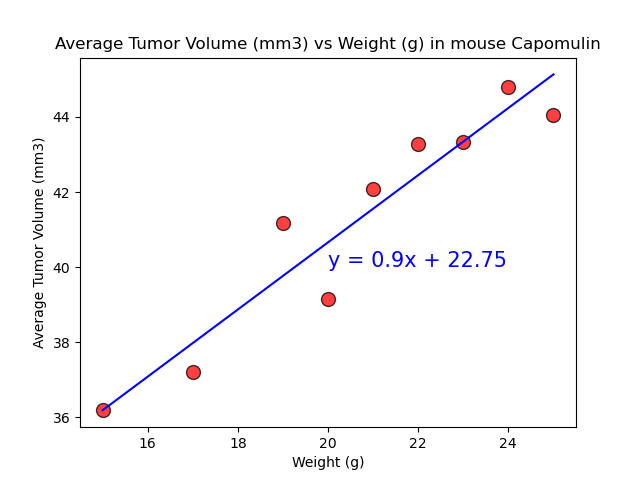

The correlation between both factors is 0.95


In [249]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
%matplotlib notebook
from scipy.stats import linregress

CapomulinMouse_scat = mergemouse_1[mergemouse_1["Drug Regimen"].isin(["Capomulin"])]
CapomulinMouse_scat

CapomulinMouse_scat_2 = CapomulinMouse_scat[["Tumor Volume (mm3)","Weight (g)"]]
CapomulinMouse_scat_2


CapomulinMouse_scat_3 = CapomulinMouse_scat_2.groupby(["Weight (g)"])
CapomulinMouse_scat_3

CapomulinMouse_scat_4 = CapomulinMouse_scat_3
CapomulinMouse_scat_4 = round(CapomulinMouse_scat_3[["Tumor Volume (mm3)"]].mean(),2)
CapomulinMouse_scat_4

x_axis_scat = CapomulinMouse_scat_4.index.values.tolist()
list(np.float_(x_axis_scat))
x_axis_scat

y_axis_scat = CapomulinMouse_scat_4["Tumor Volume (mm3)"].to_numpy()
y_axis_scat

plt.scatter(x_axis_scat, y_axis_scat, marker="o", facecolors="red", edgecolors="black",
            s=100, alpha=0.75)

plt.title("Average Tumor Volume (mm3) vs Weight (g) in mouse Capomulin")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
correlation = st.pearsonr(x_axis_scat,y_axis_scat)
print(f"The correlation between both factors is {round(correlation[0],2)}")


x_axis_scat1 = pd.DataFrame(x_axis_scat, columns = ['x_values'])
x_axis_scat2 = x_axis_scat1['x_values']
x_axis_scat2

y_axis_scat1 = pd.DataFrame(y_axis_scat, columns = ['y_values'])
y_axis_scat2 = y_axis_scat1['y_values']
y_axis_scat2


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_scat2, y_axis_scat2)
regress_values = x_axis_scat2 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis_scat2,regress_values,"b-")
plt.annotate(line_eq,(20,40),fontsize=15,color="blue")
plt.show()
